---

# Análisis de datos archivo Datos Reembolsos Haulmer

Por : Christian Vergara Retamal - Benjamín Sánchez Aliste
      

El siguiente archivo fué proporcionado por x perteneciente al equipo/área de x en Haulmer. Los datos dispuestos se obtienen desde el proceso de x con los clientes, en el cuál se detallan las siguientes variables : 

* Tipo de incidencia : 
* Clave : 
* Resumen : 
* Responsable : 
* Informador : 
* Estado : 
* Creada :   
* Actualizada :      
* Descripción :     
* Ejecutivo Comercial : 
* Ejecutivo de Retención :     
* Email Cliente :      
* Empresa de Solicitud :     
* Fecha pago reembolso :     
* Monto a reembolsar :      
* Motivo solicitud :      
* Nombre :     
* Número de Orden de compra :     
* Producto :      
* Retener :     
* Rut Empresa :     
* Periodo :     


---

## Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

---

## Preparación Ambiente de Trabajo

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Importación y observación del set de datos

In [2]:
# Datos de ConversionLeads Haulmer
data = pd.read_csv("/content/drive/MyDrive/Datos/Datos Tesis/hojamaster.csv")

In [3]:
# Las columnas del set de datos
data.columns

Index(['Tipo de Incidencia', 'Clave', 'Resumen', 'Responsable', 'Informador',
       'Estado', 'Creada', 'Actualizada', 'Descripción', 'Ejecutivo Comercial',
       'Ejecutivo de Retención', 'Email Cliente', 'Empresa de Solicitud',
       'Fecha pago reembolso', 'Monto a Reembolsar',
       'Motivo Solicitud (Seleccionar solo 1)', 'Nombre',
       'Número de Orden de Compra', 'Producto', 'Retener', 'RUT Empresa',
       'Periodo'],
      dtype='object')

In [4]:
# Muestra del conjunto de datos
data.sample(5)

,Tipo de Incidencia,Clave,Resumen,Responsable,Informador,Estado,Creada,Actualizada,Descripción,Ejecutivo Comercial,...,Empresa de Solicitud,Fecha pago reembolso,Monto a Reembolsar,Motivo Solicitud (Seleccionar solo 1),Nombre,Número de Orden de Compra,Producto,Retener,RUT Empresa,Periodo
1287,Reembolso (Reembolso),WAR-418,Reembolso [raveaupropiedades.cl],Francisca López,Juan Acuña,REEMBOLSO REALIZADO,14/06/2021 11:29:20,20/10/2021 11:56:09,Cliente no tiene acceso remoto a mysql y adema...,NaN,...,BlueHosting,20/07/2021,53457,Servicio no cumple con lo deseado.,Alejandro Viada,238578.0,Hosting,Sí,NaN,1/06/2021
46,Reembolso (Reembolso),WAR-1687,[OpenCloud] 186.64.122.172,Marcelo Zuñiga,Patricio Díaz Piña,RETENER,14/04/2022 22:17:23,19/04/2022 12:06:16,Clienta se contacta indicando que fue asesorad...,NaN,...,BlueHosting,NaN,114240,NaN,Valeria Hurtado,274466.0,Hosting,Sí,NaN,1/04/2022
690,Reembolso (Reembolso),WAR-1037,Reembolso [siicol.com],Francisca López,Juan Acuña,REEMBOLSO REALIZADO,11/11/2021 11:21:07,13/12/2021 18:17:48,Muy buenas tardes me gustaria pedir reembolso ...,NaN,...,BlueHosting,13/12/2021,"177485,92",Servicio no cumple con lo deseado.,Juan Camilo Vallejos,253323.0,Hosting,Sí,NaN,1/11/2021
127,Reembolso (Reembolso),WAR-1606,Reembolso [fyjtechnology.cl],Francisca López,Juan Acuña,RETENCIÓN REALIZADA,30/03/2022 17:08:44,8/04/2022 8:48:13,El reembolso es sobre la transferencia de un d...,NaN,...,Hosty,NaN,8900,Decisión Personal,Jose Curitol,40843.0,Hosting,Sí,NaN,1/03/2022
1165,Reembolso (Reembolso),WAR-558,Reembolso [tiokubito.cl],Francisca López,Juan Acuña,REEMBOLSO REALIZADO,19/07/2021 17:47:54,20/10/2021 11:01:10,No era el servicio que el cliente esperaba,Gabriel Barrios,...,BlueHosting,3/08/2021,187434,Decisión Personal;Servicio no cumple con lo de...,Mauro Leiva,242779.0,Hosting,Sí,NaN,1/07/2021


In [5]:
# Cantidad de filas y columnas
print("El dataframe anime consta de {} atributos (columnas) y {} registros (filas)".format(data.shape[1], data.shape[0]))

El dataframe anime consta de 22 atributos (columnas) y 1621 registros (filas)


## Análisis descriptivo

In [6]:
# Cantidad de registros por columna y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tipo de Incidencia                     1621 non-null   object 
 1   Clave                                  1621 non-null   object 
 2   Resumen                                1621 non-null   object 
 3   Responsable                            1614 non-null   object 
 4   Informador                             1621 non-null   object 
 5   Estado                                 1621 non-null   object 
 6   Creada                                 1621 non-null   object 
 7   Actualizada                            1621 non-null   object 
 8   Descripción                            1604 non-null   object 
 9   Ejecutivo Comercial                    294 non-null    object 
 10  Ejecutivo de Retención                 1396 non-null   object 
 11  Emai

In [7]:
# Descripción de los datos numéricos
data.describe()

,Número de Orden de Compra
count,1.550000e+03
mean,2.329689e+08
std,6.453755e+09
min,0.000000e+00
25%,1.023428e+05
50%,1.338870e+05
75%,2.030550e+05
max,1.797212e+11


In [8]:
# Descripción de los datos categóricos
data.describe(include = "object")

,Tipo de Incidencia,Clave,Resumen,Responsable,Informador,Estado,Creada,Actualizada,Descripción,Ejecutivo Comercial,...,Email Cliente,Empresa de Solicitud,Fecha pago reembolso,Monto a Reembolsar,Motivo Solicitud (Seleccionar solo 1),Nombre,Producto,Retener,RUT Empresa,Periodo
count,1621,1621,1621,1614,1621,1621,1621,1621,1604,294,...,1621,1607,750,1445,1127,1621,1610,1468,1006,1485
unique,3,1621,1507,13,14,23,1596,1606,1567,20,...,1456,14,128,834,27,1536,14,2,899,12
top,Reembolso (Reembolso),WAR-1733,Retracto [N/-A],Francisca López,Juan Acuña,REEMBOLSO REALIZADO,13/04/2021 14:51:26,24/08/2021 13:03:35,reembolso,Nicolas Ceresuela,...,juan.acuna@haulmer.com,BlueHosting,31/12/2021,23550,Servicio no cumple con lo deseado.,Miguel Antonio Cruzatt Yarasca,Hosting,Sí,N/-A,1/11/2021
freq,1190,1,6,908,1597,748,3,3,4,62,...,14,412,30,120,185,3,490,1253,12,147


In [9]:
# Verificación de datos nulos por columna
data.isna().sum()

Tipo de Incidencia                          0
Clave                                       0
Resumen                                     0
Responsable                                 7
Informador                                  0
Estado                                      0
Creada                                      0
Actualizada                                 0
Descripción                                17
Ejecutivo Comercial                      1327
Ejecutivo de Retención                    225
Email Cliente                               0
Empresa de Solicitud                       14
Fecha pago reembolso                      871
Monto a Reembolsar                        176
Motivo Solicitud (Seleccionar solo 1)     494
Nombre                                      0
Número de Orden de Compra                  71
Producto                                   11
Retener                                   153
RUT Empresa                               615
Periodo                           

## Análisis Univariado de atributos

### Variables numéricas

In [10]:
# Obtención de columnas numéricas del set de datos
columnas_numericas = data.select_dtypes(include = ["float64", "int64"])

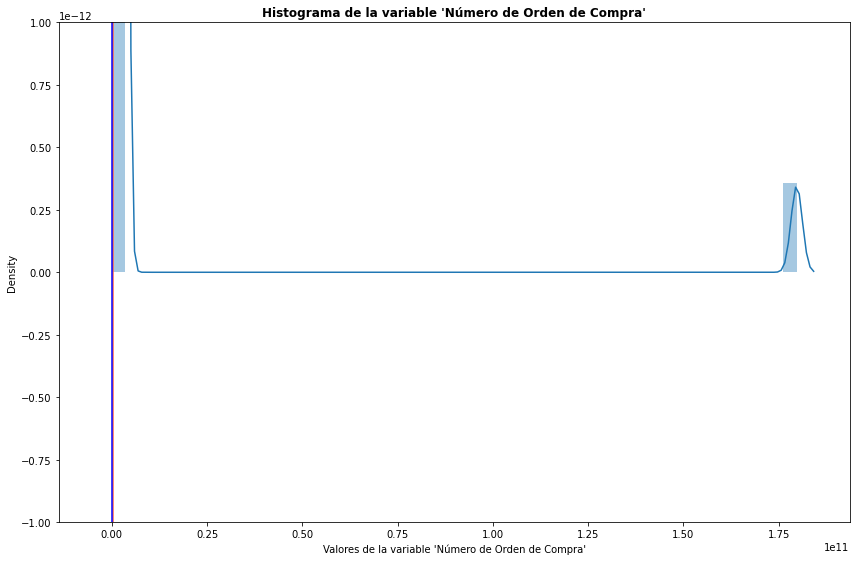

In [11]:
plt.figure(figsize=(12,15))
for index, col in enumerate(columnas_numericas):
    plt.subplot((len(list(columnas_numericas)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if data[col].dtypes == "float64":
        sns.distplot(data[col])
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif data[col].dtypes == "int64":
        sns.distplot(data[col], kde = False, bins = 50)
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

### Variables categóricas

In [12]:
# Creación de función para visualizar frecuencia de valores que puede tomar el respectivo atributo
def plot_freq(df, col): 
  plt.figure(figsize=(10,8))
  aux_dict = df[col].value_counts().to_dict()
  y = list(aux_dict.values())
  plt.barh(*zip(*aux_dict.items()))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.title("Frecuencia de la columnas {}".format(col))
  plt.show()
  plt.tight_layout()

#### Atributo "Tipo de incidencia" 

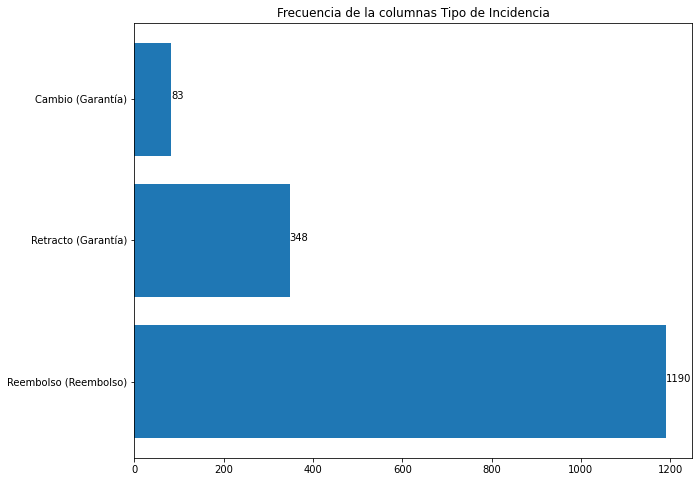

<Figure size 432x288 with 0 Axes>

In [13]:
plot_freq(data, "Tipo de Incidencia")

#### Atributo "Responsable"

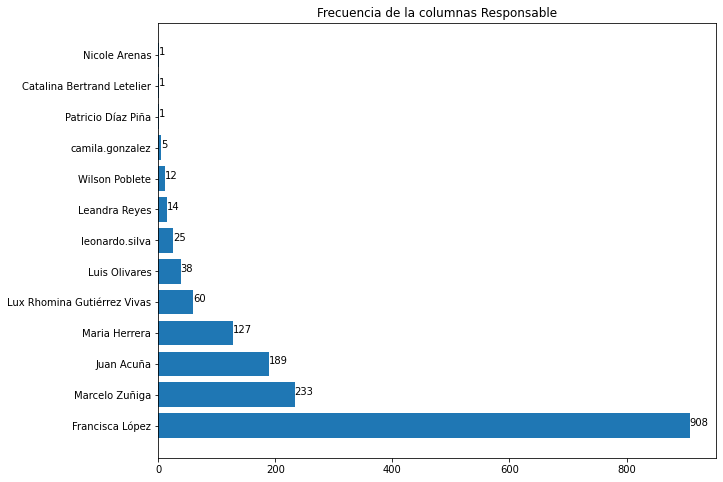

<Figure size 432x288 with 0 Axes>

In [14]:
plot_freq(data, "Responsable")

#### Atributo "Informador"

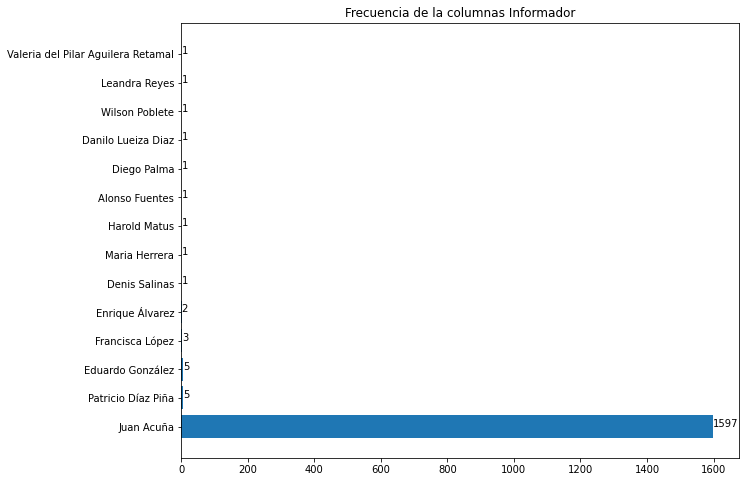

<Figure size 432x288 with 0 Axes>

In [15]:
plot_freq(data, "Informador")

#### Atributo "Estado"

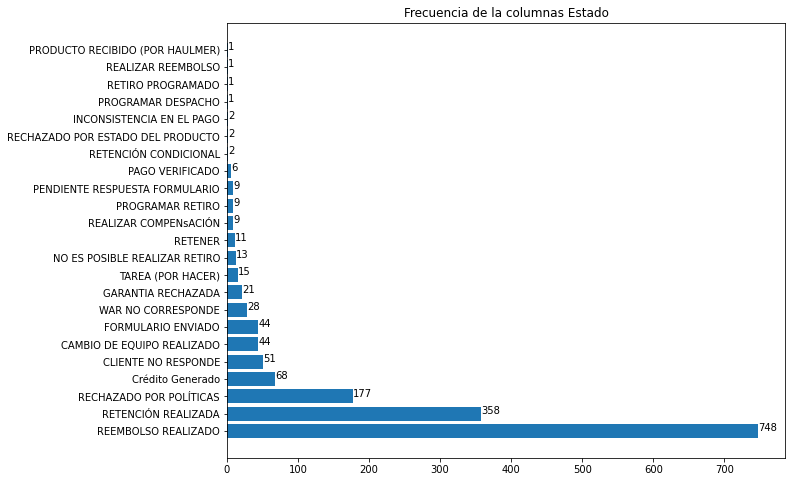

<Figure size 432x288 with 0 Axes>

In [16]:
plot_freq(data, "Estado")

#### Atributo "Descripción"

**Realizar wordcloud y análisis de sentimientos**

#### Atributo "Empresa de solicitud"

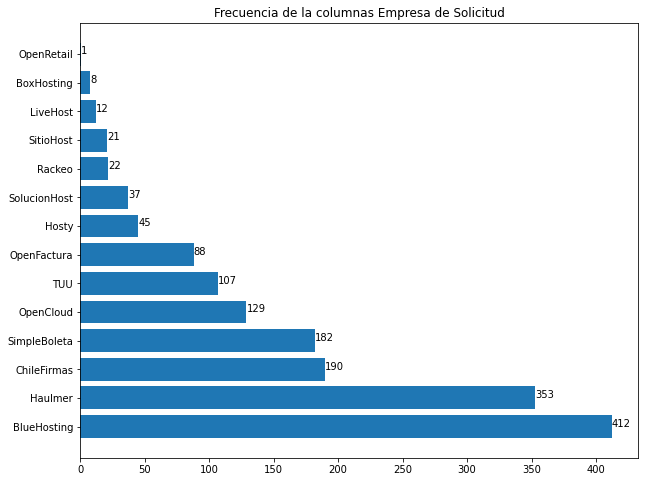

<Figure size 432x288 with 0 Axes>

In [17]:
plot_freq(data, "Empresa de Solicitud")

#### Atributo Ejecutivo de Retención

In [18]:
data["Ejecutivo de Retención"].value_counts()

Marcelo Zuñiga    900
Otro              247
Leonardo Silva    107
Leandra Reyes      68
Juan Acuña         53
Wilson Poblete     21
Name: Ejecutivo de Retención, dtype: int64

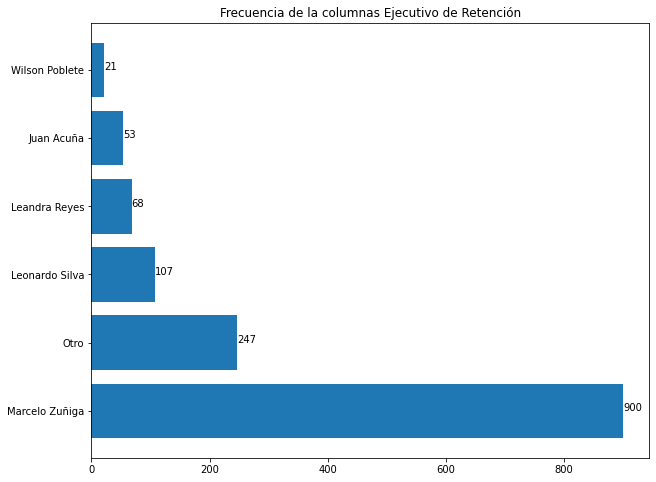

<Figure size 432x288 with 0 Axes>

In [19]:
plot_freq(data, "Ejecutivo de Retención")

#### Atributo Monto a Reembolsar

In [20]:
data["Monto a Reembolsar"].value_counts()

23550        120
214081        53
17600         48
0             42
71400         29
            ... 
5934           1
71043          1
177485,92      1
115068         1
88044          1
Name: Monto a Reembolsar, Length: 834, dtype: int64

In [21]:
data["Monto a Reembolsar"] = data["Monto a Reembolsar"].str.replace(",",".")

In [22]:
data["Monto a Reembolsar"] = data["Monto a Reembolsar"].astype(float)

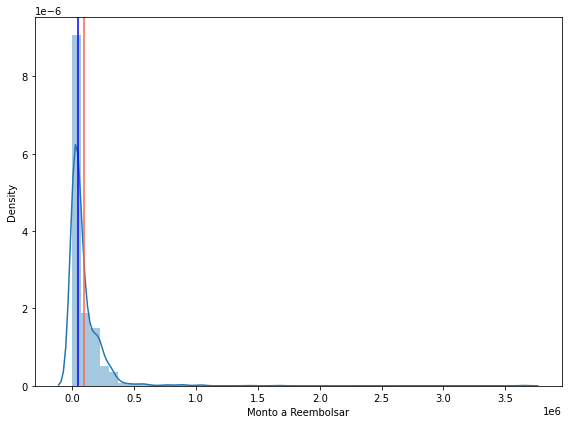

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(data["Monto a Reembolsar"])
plt.axvline(data["Monto a Reembolsar"].mean(), color='tomato')
plt.axvline(data["Monto a Reembolsar"].median(), color='blue')
plt.tight_layout()

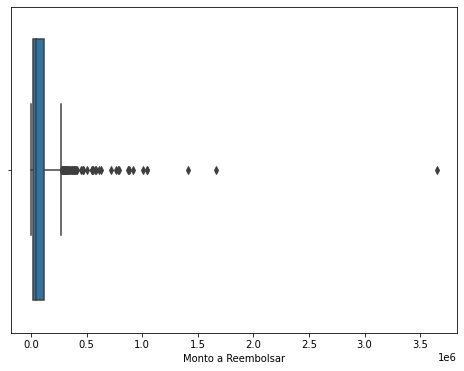

In [24]:
plt.figure(figsize = (8,6))
sns.boxplot(data["Monto a Reembolsar"])

#### Atributo Motivo Solicitud 

In [25]:
data.rename(columns = {"Motivo Solicitud (Seleccionar solo 1)":"Motivo solicitud"}, inplace = True)

In [26]:
data["Motivo solicitud"].value_counts()

Servicio no cumple con lo deseado.                                       185
Decisión Personal                                                        181
Atención desde el área de soporte.                                       180
Cambio de Proveedor                                                      141
Otros                                                                     96
Compra de Producto erroneo                                                76
Problemas en la Activación del Producto                                   61
Mal asesoramiento desde el área de ventas.                                43
Pago de Servicio Terminado.                                               32
Situaciones Pendientes en el SII.                                         26
Habilitación de Servicio                                                  24
Tiempo en certificación, Problemas con verificación de Actividades.       19
Tiempo de certificación, no completación del Setup.                       11

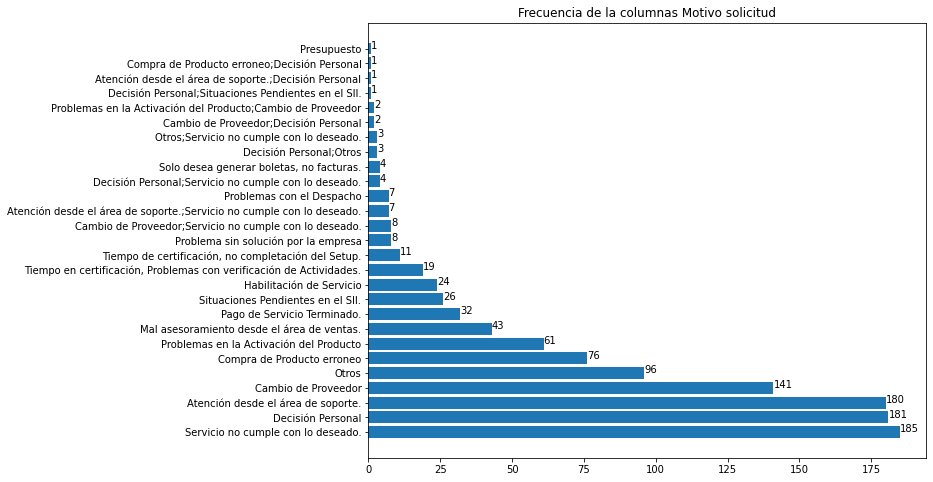

<Figure size 432x288 with 0 Axes>

In [27]:
plot_freq(data, "Motivo solicitud")

#### Atributo Producto

In [28]:
data["Producto"].value_counts()

Hosting              490
Simpleboleta         358
Firma Electrónica    218
Tuu - Terminal       158
Openfactura          133
Cloud Server         104
VPS                   89
Impresora             32
Lector                 6
Rollos Térmicos        6
Simple                 6
Chip de Datos          6
Openretail             3
Tuu                    1
Name: Producto, dtype: int64

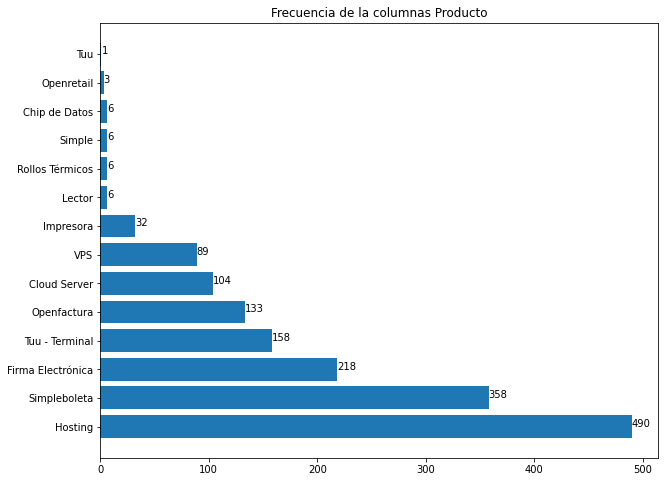

<Figure size 432x288 with 0 Axes>

In [30]:
plot_freq(data, "Producto")

#### Atributo Retener

In [31]:
data["Retener"].value_counts()

Sí    1253
No     215
Name: Retener, dtype: int64

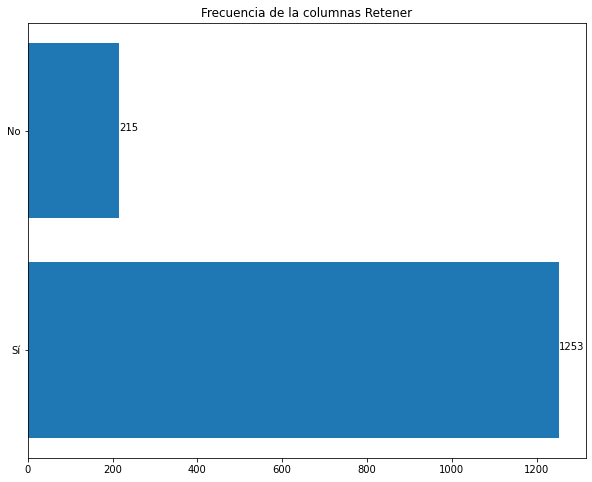

<Figure size 432x288 with 0 Axes>

In [32]:
plot_freq(data, "Retener")

#### Atributo Periodo

In [33]:
data["Periodo"].value_counts()

1/11/2021    147
1/08/2021    146
1/06/2021    139
1/03/2022    132
1/12/2021    129
1/05/2021    127
1/04/2022    121
1/02/2022    120
1/10/2021    113
1/09/2021    108
1/07/2021    105
1/01/2022     98
Name: Periodo, dtype: int64